In [20]:
#Adding necessary Libraries and module for item to item similarity
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

In [21]:
df1 = pd.read_excel('.//Online Retail.xlsx')

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [23]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [24]:
df1.isnull().any()

InvoiceNo      False
StockCode      False
Description     True
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID      True
Country        False
dtype: bool

In [25]:
df1['CustomerID'].isna().sum()

135080

In [26]:
df1a = df1.dropna(subset=['CustomerID'])

In [27]:
df1a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [28]:
df1a.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [29]:
CustomerID_Item_matrix = df1a.pivot_table(
    index='CustomerID', 
    columns='StockCode', 
    values='Quantity',
    aggfunc='sum'
)

In [30]:
CustomerID_Item_matrix.shape

(4372, 3684)

In [31]:
CustomerID_Item_matrix = CustomerID_Item_matrix.applymap(lambda x: 1 if x > 0 else 0)

In [32]:
CustomerID_Item_matrix.loc[12680:].head()

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12680.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12681.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12682.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12683.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12684.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [33]:
item_item_similarity_matrix = pd.DataFrame(
    cosine_similarity(CustomerID_Item_matrix.T)
)

In [34]:
item_item_similarity_matrix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3684 entries, 0 to 3683
Columns: 3684 entries, 0 to 3683
dtypes: float64(3684)
memory usage: 103.5 MB


In [35]:
item_item_similarity_matrix.head()

,0,1,2,3,4,5,6,7,8,9,...,3674,3675,3676,3677,3678,3679,3680,3681,3682,3683
0,1.000000,0.000000,0.094868,0.090351,0.063246,0.098907,0.095346,0.047673,0.076139,0.091050,...,0.0,0.0,0.0,0.029361,0.0,0.0,0.0,0.059423,0.00,0.070057
1,0.000000,1.000000,0.000000,0.032774,0.045883,0.047836,0.000000,0.000000,0.082855,0.049541,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.017244,0.00,0.000000
2,0.094868,0.000000,1.000000,0.057143,0.060000,0.041703,0.060302,0.060302,0.096309,0.028793,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.075165,0.00,0.000000
3,0.090351,0.032774,0.057143,1.000000,0.042857,0.044682,0.043073,0.000000,0.051594,0.030849,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.075165,0.00,0.071209
4,0.063246,0.045883,0.060000,0.042857,1.000000,0.281494,0.045227,0.060302,0.072232,0.057585,...,0.0,0.0,0.0,0.037139,0.0,0.0,0.0,0.067648,0.05,0.016615


In [36]:
item_item_similarity_matrix.columns = CustomerID_Item_matrix.T.index
item_item_similarity_matrix['StockCode'] = CustomerID_Item_matrix.T.index
item_item_similarity_matrix = item_item_similarity_matrix.set_index('StockCode')


In [37]:
item_item_similarity_matrix.head()

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,1.000000,0.000000,0.094868,0.090351,0.063246,0.098907,0.095346,0.047673,0.076139,0.091050,...,0.0,0.0,0.0,0.029361,0.0,0.0,0.0,0.059423,0.00,0.070057
10080,0.000000,1.000000,0.000000,0.032774,0.045883,0.047836,0.000000,0.000000,0.082855,0.049541,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.017244,0.00,0.000000
10120,0.094868,0.000000,1.000000,0.057143,0.060000,0.041703,0.060302,0.060302,0.096309,0.028793,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.075165,0.00,0.000000
10125,0.090351,0.032774,0.057143,1.000000,0.042857,0.044682,0.043073,0.000000,0.051594,0.030849,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.075165,0.00,0.071209
10133,0.063246,0.045883,0.060000,0.042857,1.000000,0.281494,0.045227,0.060302,0.072232,0.057585,...,0.0,0.0,0.0,0.037139,0.0,0.0,0.0,0.067648,0.05,0.016615


In [38]:
top_10_similar_items = list(
    item_item_similarity_matrix\
        .loc[23843]\
        .sort_values(ascending=False)\
        .iloc[:10]\
    .index
)

In [39]:
top_10_similar_items

[10002, 72134, 72586, 72598, 72709, 72741, 72780, 72783, 72811, 72812]

In [40]:
df1a.loc[
    df1a['StockCode'].isin(top_10_similar_items), 
    ['StockCode', 'Description']
].drop_duplicates().set_index('StockCode').loc[top_10_similar_items]

,Description
StockCode,
10002,INFLATABLE POLITICAL GLOBE
72134,COLUMBIAN CUBE CANDLE
72586,SET OF 6 HALLOWEEN GHOST T-LIGHTS
72598,SET/12 TAPER CANDLES
72709,IVORY SCULPTED RND CANDLE
72741,GRAND CHOCOLATECANDLE
72780,BLACK SILOUETTE CANDLE PLATE
72783,BLACK SIL'T SQU CANDLE PLATE
72811,SMALL ZINC/GLASS CANDLEHOLDER


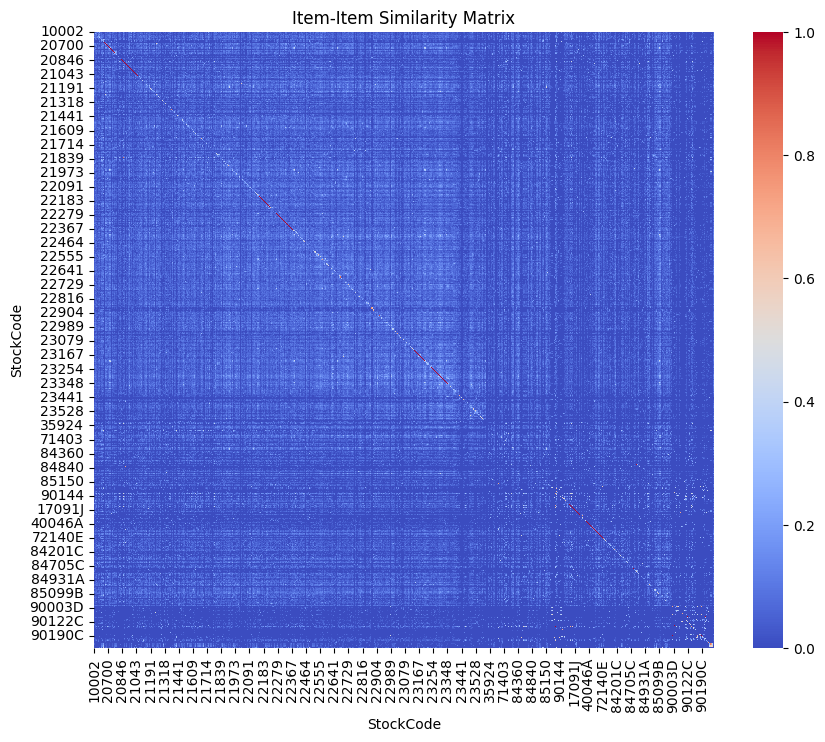

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap using Seaborn
sns.heatmap(item_item_similarity_matrix, cmap='coolwarm', annot=False)

# Add labels and title
plt.xlabel('StockCode')
plt.ylabel('StockCode')
plt.title('Item-Item Similarity Matrix')

# Show the plot
plt.show()
